<a href="https://colab.research.google.com/github/sherinshibu111/Internship-23/blob/main/Background%20Study/samplecode3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python_louvain

In [ ]:
pip install community

In [ ]:
import pandas as pd
import networkx as nx
from community import community_louvain

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/KarthikaSrnvs/dataset/main/titanic.csv")
data

,No,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
G = nx.Graph()


for passenger_id in data['Ticket']:
    G.add_node(passenger_id)


for index, row in data.iterrows():
    passenger1_id = row['Ticket']
    for contact in row['Name']:
        passenger2_id = contact
        if passenger1_id != passenger2_id:
            G.add_edge(passenger1_id, passenger2_id)

In [ ]:
partition = community_louvain.best_partition(G)

In [ ]:
communities = community_louvain.best_partition(G, resolution=1.0)

In [ ]:
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

In [ ]:
import matplotlib.pyplot as plt

Community A/5 21171: 0
Community PC 17599: 1
Community STON/O2. 3101282: 2
Community 113803: 3
Community 373450: 4
Community 330877: 5
Community 17463: 6
Community 349909: 7
Community 347742: 8
Community 237736: 9
Community PP 9549: 10
Community 113783: 11
Community A/5. 2151: 12
Community 347082: 13
Community 350406: 14
Community 248706: 15
Community 382652: 16
Community 244373: 17
Community 345763: 18
Community 2649: 19
Community 239865: 20
Community 248698: 21
Community 330923: 22
Community 113788: 23
Community 347077: 24
Community 2631: 25
Community 19950: 26
Community 330959: 27
Community 349216: 28
Community PC 17601: 29
Community PC 17569: 30
Community 335677: 31
Community C.A. 24579: 32
Community PC 17604: 33
Community 113789: 34
Community 2677: 35
Community A./5. 2152: 36
Community 345764: 37
Community 2651: 38
Community 7546: 39
Community 11668: 40
Community 349253: 41
Community SC/Paris 2123: 42
Community 330958: 43
Community S.C./A.4. 23567: 44
Community 370371: 45
Communit

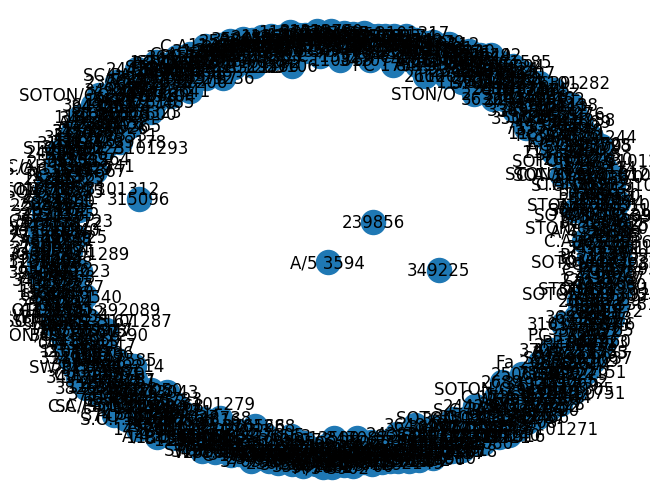

In [ ]:
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt


titanic_data = pd.read_csv('https://raw.githubusercontent.com/KarthikaSrnvs/dataset/main/titanic.csv')


G = nx.Graph()


for index, row in titanic_data.iterrows():
    G.add_node(row['Ticket'], name=row['Name'])


communities = community_louvain.best_partition(G)


for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")


nx.draw(G, with_labels=True)
plt.show()


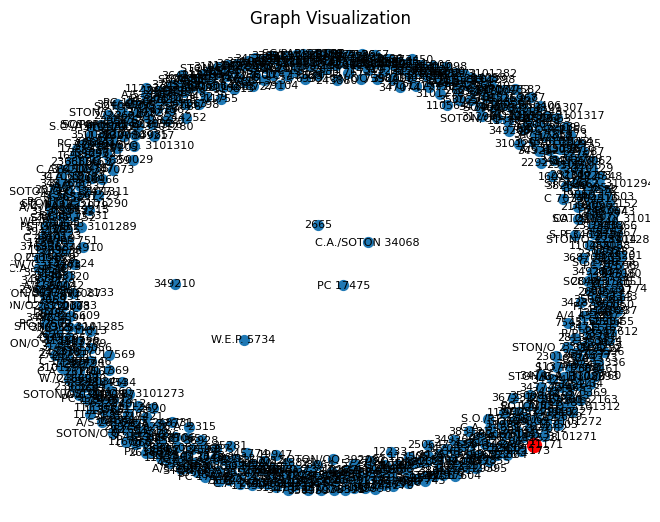

In [ ]:
import matplotlib.pyplot as plt


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)


most_influential_nodes = [node for node, community in communities.items() if community == most_influential_community]
nx.draw_networkx_nodes(G, pos, nodelist=most_influential_nodes, node_color='red', node_size=100)

plt.title('Graph Visualization')
plt.show()

